In [1]:
# Import required dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment=None  # default='warn'
import seaborn as sns

In [2]:
# Load dataset

df = pd.read_csv('data/emails.csv')
df

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [3]:
# Check sample data

df.iloc[0].file

'allen-p/_sent_mail/1.'

In [4]:
df.iloc[1].message

"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what 

In [5]:
print(df.iloc[1].message)

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

In [6]:
# Import email library & convert message to email obj
import email

message = df.iloc[1].message
email_message = email.message_from_string(message)

# Check sample email
email_message.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [7]:
# Extract relevant information from email

message_id = email_message["Message-ID"]
date = email_message["Date"]
from_ = email_message["From"]
to_ = email_message["To"]
subject = email_message["Subject"]
x_from = email_message["X-From"]
x_to = email_message["X-To"]
x_folder = email_message["X-Folder"]
content_type = email_message["Content-Type"]
email_body = email_message.get_payload()

print(f"Message-ID: {message_id}")
print(f"Date: {date}")
print(f"From: {from_}")
print(f"To: {to_}")
print(f"X-From: {x_from}")
print(f"X-To: {x_to}")
print(f"X-Folder: {x_folder}")
print(f"Content-Type: {content_type}")
print(f"Email body: {email_body}")

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
Content-Type: text/plain; charset=us-ascii
Email body: Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round tab

In [8]:
# Create utility function to extract email fields and content

from tqdm import tqdm

def extract_email_field(field, df):
    data = []
    for row in tqdm(df):
        email_message = email.message_from_string(row)
        data.append(email_message[field])
    return data

# Create utility function to extract textual email body from message

def extract_email_content(df):
    data = []
    for row in tqdm(df):
        email_message = email.message_from_string(row)
        body = email_message.get_payload()
        data.append(body)
    return data

In [9]:
df

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [10]:
# Extract Message-ID, Date, From, To, Subject, X-From, X-To, and Content 

df["message_id"] = extract_email_field("Message-ID", df["message"])
df["date"] = extract_email_field("Date", df["message"])
df["from"] = extract_email_field("From", df["message"])
df["to"] = extract_email_field("To", df["message"])
df["subject"] = extract_email_field("Subject", df["message"])
df["x-from"] = extract_email_field("X-From", df["message"])
df["x-folder"] = extract_email_field("X-Folder", df["message"])
df["x-to"] = extract_email_field("X-To", df["message"])
df["content"] = extract_email_content(df["message"])
df

100%|████████████████████████████████| 517401/517401 [00:51<00:00, 10051.62it/s]


,file,message,message_id,date,from,to,subject,x-from,x-folder,x-to,content
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.
...,...,...,...,...,...,...,...,...,...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...,<26807948.1075842029936.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 13:30:11 -0800 (PST)",john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...,<25835861.1075842029959.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 12:47:48 -0800 (PST)",john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...,<28979867.1075842029988.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 07:20:00 -0800 (PST)",john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...,<22052556.1075842030013.JavaMail.evans@thyme>,"Tue, 27 Nov 2001 11:52:45 -0800 (PST)",john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


In [11]:
# Next, drop the initial column names "file", "message" and keep extracted fields from email

df.drop(columns=["file", "message"], axis=1, inplace=True)
df

,message_id,date,from,to,subject,x-from,x-folder,x-to,content
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s..."
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.
...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 13:30:11 -0800 (PST)",john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...
517397,<25835861.1075842029959.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 12:47:48 -0800 (PST)",john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...
517398,<28979867.1075842029988.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 07:20:00 -0800 (PST)",john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...
517399,<22052556.1075842030013.JavaMail.evans@thyme>,"Tue, 27 Nov 2001 11:52:45 -0800 (PST)",john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


### Data Analysis

In [12]:
# Check data types for each column name

df.dtypes

message_id    object
date          object
from          object
to            object
subject       object
x-from        object
x-folder      object
x-to          object
content       object
dtype: object

In [13]:
# Replace empty strings with Numpy nan values to check how much missing data we have in each column

df = df.replace("", np.nan)
nan_values = df[df.isna().any(axis=1)]
nan_values

,message_id,date,from,to,subject,x-from,x-folder,x-to,content
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s..."
6,<16254169.1075863688286.JavaMail.evans@thyme>,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,"david.l.johnson@enron.com, John Shafer",Please cc the following distribution list with...
11,<25459584.1075855687536.JavaMail.evans@thyme>,"Fri, 13 Oct 2000 06:45:00 -0700 (PDT)",phillip.allen@enron.com,stagecoachmama@hotmail.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,stagecoachmama@hotmail.com,"Lucy,\n\n Here are the rentrolls:\n\n\n\n Open..."
14,<2465689.1075855687605.JavaMail.evans@thyme>,"Thu, 5 Oct 2000 06:26:00 -0700 (PDT)",phillip.allen@enron.com,david.delainey@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,David W Delainey,"Dave, \n\n Here are the names of the west desk..."
...,...,...,...,...,...,...,...,...,...
516927,<27830378.1075842022474.JavaMail.evans@thyme>,"Thu, 31 Jan 2002 13:22:01 -0800 (PST)",no.address@enron.com,None,Weekend Outage Report for 2/1/02 - 2/3/02,Enron Change Management Announcement@ENRON,"\ExMerge - Zufferli, John\Deleted Items",Houston Outage Report@ENRON,______________________________________________...
516976,<7647418.1075842025228.JavaMail.evans@thyme>,"Wed, 6 Feb 2002 08:02:18 -0800 (PST)",janet.mulero@ubsw.com,None,Re: Market Risk Meeting Today - John Zufferli,Janet.Mulero@ubsw.com@ENRON,"\ExMerge - Zufferli, John\Inbox",NaN,Hi.\n\n The Market Risk Meeting has b...
517247,<24283319.1075842034234.JavaMail.evans@thyme>,"Thu, 2 Aug 2001 10:02:58 -0700 (PDT)",john.zufferli@enron.com,majordomo@majordomo.pjm,NaN,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items",'majordomo@majordomo.pjm',unsubscribe pjm-customer-info
517289,<3432160.1075842035153.JavaMail.evans@thyme>,"Tue, 3 Jul 2001 12:31:56 -0700 (PDT)",john.zufferli@enron.com,john.lavorato@enron.com,NaN,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",home number is (403) 685-4817


There are 40676 records which contains null values. We'll take a look at each missing values in each column.

In [14]:
# We can also see the total number of missing values in each column

df.isnull().sum()

message_id        0
date              0
from              0
to            21847
subject       19187
x-from           29
x-folder         29
x-to           9153
content           0
dtype: int64

We can see that the columns that have missing values are: 'to', 'subject', 'x-from', 'x-folder', 'x-to'

All emails have content as there are no missing values in the 'content' column name.

However, there are 19187 emails which don't have any subject. We will keep these emails as there might be important information which we can use for our Named Entity Recognition (NER) model e.g. extract mentioned person names, locations or even dates. There could be cases when the exchanged emails won't have a subject but important information. 

Instead we can drop all records that don't have specified specified information regarding the sender "from" and receiver "to". Here "from" represents the email sender whereas "to" represents the receiver email.

We can do the same for "x-from" and "x-to". Here the "x-from" represents the sender person whereas the "x-to" represents the receiver person.

In [15]:
df.dropna(subset=['to', 'x-from', 'x-to']).isnull().sum()

message_id        0
date              0
from              0
to                0
subject       18822
x-from            0
x-folder          0
x-to              0
content           0
dtype: int64

After dropping all null values in 'to', 'from', 'x-from', 'x-to' we can see that 365 emails without subject were removed

In [16]:
# Drop missing values in 'to', 'x-from', 'x-to'

df = df.dropna(subset=['to', 'x-from', 'x-to'])
df

,message_id,date,from,to,subject,x-from,x-folder,x-to,content
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s..."
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.
...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 13:30:11 -0800 (PST)",john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...
517397,<25835861.1075842029959.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 12:47:48 -0800 (PST)",john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...
517398,<28979867.1075842029988.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 07:20:00 -0800 (PST)",john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...
517399,<22052556.1075842030013.JavaMail.evans@thyme>,"Tue, 27 Nov 2001 11:52:45 -0800 (PST)",john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


### Data Analysis

We'll start analyzing email data distribution over time using the date column feature. This includes analyzing data distribution by year, month and day.
Next, we'll check the email subject, the type of the email and the total number of words in each email.

In [17]:
sample_date = df["date"].iloc[0]
sample_date

'Mon, 14 May 2001 16:39:00 -0700 (PDT)'

In [18]:
# We can convert date into a readable format e.g. Year-Month-Day Hour:Minute:Second
# We can then extract the year and check data distribution per year

import datetime
from dateutil import parser

x = parser.parse(sample_date)
print(x.strftime("%Y-%m-%d %H:%M:%S"))

2001-05-14 16:39:00


In [19]:
def parse_date(date_str):
    """
    Parse date
    """
    date = parser.parse(date_str)
    return date.strftime("%Y-%m-%d %H:%M:%S")

In [20]:
tqdm.pandas()

df['date'] = df['date'].progress_apply(lambda x: parse_date(x))
df

100%|█████████████████████████████████| 495547/495547 [00:51<00:00, 9641.66it/s]


,message_id,date,from,to,subject,x-from,x-folder,x-to,content
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s..."
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.
...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...
517397,<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...
517399,<22052556.1075842030013.JavaMail.evans@thyme>,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


### Analyzing Email Distribution Over Time

In [21]:
sample_date = df['date'].iloc[0]
sample_date

'2001-05-14 16:39:00'

In [22]:
year = sample_date.split(" ")[0].split("-")[0]
year

'2001'

In [23]:
month = sample_date.split(" ")[0].split("-")[1]
month

'05'

In [24]:
day = sample_date.split(" ")[0].split("-")[2]
day

'14'

In [25]:
# Extract year, month, day

df['year'] = df['date'].progress_apply(lambda x: int(x.split(" ")[0].split("-")[0]))
df['month'] = df['date'].progress_apply(lambda x: int(x.split(" ")[0].split("-")[1]))
df['day'] = df['date'].progress_apply(lambda x: int(x.split(" ")[0].split("-")[2]))
df

100%|███████████████████████████████| 495547/495547 [00:00<00:00, 784934.35it/s]


,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,2001,5,14
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,2001,5,4
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!,2000,10,18
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.,2000,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001,11,28
517397,<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...,2001,11,28
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...,2001,11,28
517399,<22052556.1075842030013.JavaMail.evans@thyme>,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,2001,11,27


### Email Distribution by Year

In [26]:
# Check data distribution per year

df['year'].value_counts()

2001    256470
2000    192905
2002     34713
1999     10896
1979       316
1998       166
2004        70
2044         3
2020         2
1986         2
2007         1
2005         1
1997         1
2043         1
Name: year, dtype: int64

In [27]:
year_stats = df['year'].value_counts().rename_axis('year').reset_index(name='count')
year_stats

,year,count
0,2001,256470
1,2000,192905
2,2002,34713
3,1999,10896
4,1979,316
5,1998,166
6,2004,70
7,2044,3
8,2020,2
9,1986,2


In [28]:
# Sort records by year in ascending order
year_stats = year_stats.sort_values(by=['year'], ascending=True)
year_stats

,year,count
4,1979,316
9,1986,2
12,1997,1
5,1998,166
3,1999,10896
1,2000,192905
0,2001,256470
2,2002,34713
6,2004,70
11,2005,1


Text(0.5, 0, 'Year')

<Figure size 1500x700 with 0 Axes>

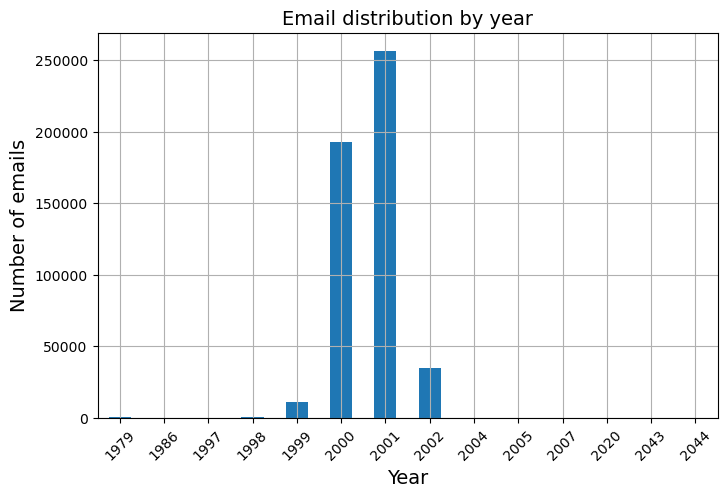

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
year_stats.plot(x='year', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Email distribution by year", fontsize=14)
plt.ylabel('Number of emails', fontsize=14)
plt.xlabel('Year', fontsize=14)

We can see that the email dataset spans between 1979 to 2044. There must be some issue that our dataset consists of data from future such as 2043 and 2044.
The email dataset consists has email data mostly from 2001 then 2000.

In [30]:
# Let's check which email records are from 2043, 2044

df[df['year'] == 2043]

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day
517045,<7291254.1075842027206.JavaMail.evans@thyme>,2043-12-28 11:34:12,cramer@cadvision.com,"linsider.jed@enron.com, john.zufferli@enron.co...",marks.xls,"""Erik Cramer"" <cramer@cadvision.com>@ENRON","\ExMerge - Zufferli, John\Inbox\Quotes","Jed Linsider <jed.linsider@mirant.com>, Zuffer...",\nHappy New Year !\n - marks.xls,2043,12,28


In [31]:
email_2024 = df[df['year'] == 2043]['content'].iloc[0]
print(email_2024)


Happy New Year !
 - marks.xls 


In [32]:
# Let's check which email records are from 2044

df[df['year'] == 2044]

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day
517039,<21511287.1075842027020.JavaMail.evans@thyme>,2044-01-04 14:48:58,cramer@cadvision.com,john.zufferli@enron.com,trades,"""Erik Cramer"" <cramer@cadvision.com>@ENRON","\ExMerge - Zufferli, John\Inbox\Quotes","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\nHowdy, \nbom went out 35 at 35.5 \nFeb trade...",2044,1,4
517040,<9293997.1075842027067.JavaMail.evans@thyme>,2044-01-04 08:59:46,cramer@cadvision.com,john.zufferli@enron.com,Trades,"""Erik Cramer"" <cramer@cadvision.com>@ENRON","\ExMerge - Zufferli, John\Inbox\Quotes","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\nBOM 5th to 31st traded 34, 33.5 , 33.5 and ...",2044,1,4
517042,<15177697.1075842027136.JavaMail.evans@thyme>,2044-01-02 15:46:00,cramer@cadvision.com,john.zufferli@enron.com,trades jan 2002,"""Erik Cramer"" <cramer@cadvision.com>@ENRON","\ExMerge - Zufferli, John\Inbox\Quotes","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",\nfeb dec trades 37.5 \nfeb dec LL went out 20...,2044,1,2


In [33]:
print(df[df['year'] == 2044]['content'].iloc[0])


Howdy, 
bom went out 35 at 35.5 
Feb traded 32.75 and 33 
Mar 33 ,(away) , 33.5, 33.75 , and  34.25. 
Q2 was lifted 33 
and Q4 closed at 39 for 25 MW 
What day are we going for lunch  next week ? 
Have good weekend 
Erik 
  


In [34]:
print(df[df['year'] == 2044]['content'].iloc[1])


BOM  5th to 31st traded 34, 33.5 , 33.5 and  34 
feb traded 34.5 away. 
q2 traded 32 and 31.5.
feb dec traded 35 small volume then 35.5 small  volume  


In [35]:
print(df[df['year'] == 2044]['content'].iloc[2])


feb dec trades 37.5 
feb dec LL went out 20 at 24 (did not have bid but  heard elswhere)
feb went out 35.5 at 37.5
mar went out 35.5 at 37
Since we can't ride I am not sure what else to do  but go for lunch........


There are 3 emails from 2044

### Emai Distribution by Month

In [36]:
month_stats = df['month'].value_counts().rename_axis('month').reset_index(name='count')
month_stats

,month,count
0,11,60126
1,10,58794
2,1,50474
3,12,45361
4,5,45226
5,4,44851
6,3,39919
7,2,37733
8,9,30645
9,6,30410


In [37]:
# Sort records by year in ascending order
month_stats = month_stats.sort_values(by=['month'], ascending=True)
month_stats

,month,count
2,1,50474
7,2,37733
6,3,39919
5,4,44851
4,5,45226
9,6,30410
11,7,23991
10,8,28017
8,9,30645
1,10,58794


Text(0.5, 0, 'Month')

<Figure size 1500x700 with 0 Axes>

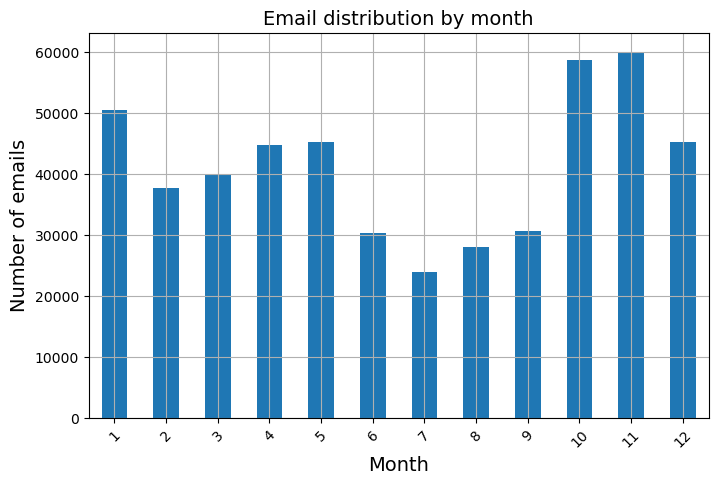

In [38]:
plt.figure(figsize=(15, 7))
month_stats.plot(x='month', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Email distribution by month", fontsize=14)
plt.ylabel('Number of emails', fontsize=14)
plt.xlabel('Month', fontsize=14)

Looking at month data distribution we can see that most emails were sent in month 11 "November" and month 10 "October" and less in month 7 "July".

### Email Distribution by Day

In [39]:
day_stats = df['day'].value_counts().rename_axis('day').reset_index(name='count')
day_stats

,day,count
0,6,18013
1,26,17999
2,12,17630
3,27,17471
4,7,17470
5,19,17428
6,20,17346
7,13,17284
8,5,17010
9,30,16939


In [40]:
# Sort records by year in ascending order
day_stats = day_stats.sort_values(by=['day'], ascending=True)
day_stats

,day,count
14,1,16117
28,2,14240
30,3,10982
26,4,14862
8,5,17010
0,6,18013
4,7,17470
13,8,16137
23,9,15509
25,10,15314


Text(0.5, 0, 'Day')

<Figure size 1500x700 with 0 Axes>

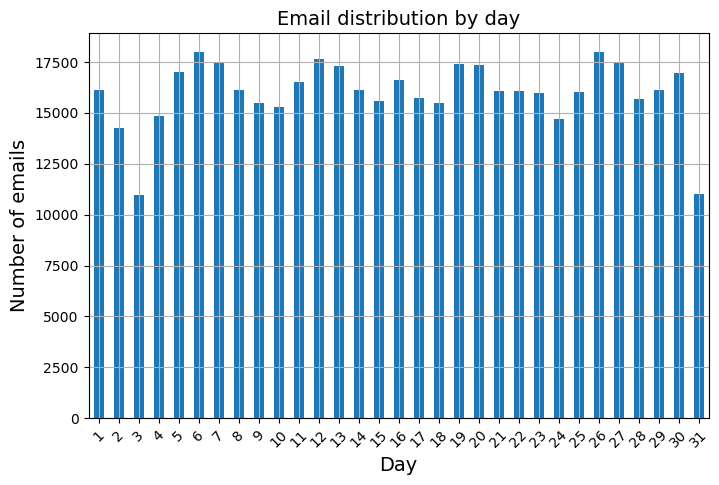

In [41]:
plt.figure(figsize=(15, 7))
day_stats.plot(x='day', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Email distribution by day", fontsize=14)
plt.ylabel('Number of emails', fontsize=14)
plt.xlabel('Day', fontsize=14)

Looking at the day data distribution, we can see that most of the emails were sent in day 26 and 27 representing the end of the month and less at the begining of the week e.g. day 3 

In [42]:
df

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,2001,5,14
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,2001,5,4
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!,2000,10,18
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.,2000,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001,11,28
517397,<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...,2001,11,28
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...,2001,11,28
517399,<22052556.1075842030013.JavaMail.evans@thyme>,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,2001,11,27


### Analyzing the number of words in each email 

In [43]:
# Remove newlines found at the beginning and ending text
df['content'] = df['content'].progress_apply(lambda x: x.strip())

# Determine the number of words in text
df["n_words"] = df["content"].progress_apply(lambda x: len(x.split()))
df

100%|████████████████████████████████| 495547/495547 [00:05<00:00, 83870.19it/s]


,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast,2001,5,14,4
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,2001,5,4,139
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!,2000,10,18,5
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23,34
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.,2000,8,31,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001,11,28,48
517397,<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...,2001,11,28,23
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...,2001,11,28,54
517399,<22052556.1075842030013.JavaMail.evans@thyme>,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,2001,11,27,27


In [44]:
df["n_words"].describe()

count    495547.000000
mean        246.255899
std         735.180533
min           1.000000
25%          45.000000
50%         113.000000
75%         254.000000
max       64024.000000
Name: n_words, dtype: float64

We can see that on average the total number of words in an email is 246 and the maximum being 64024. However, there are also emails that have only one word

In [45]:
# Check emails that have 1 word

df[df["n_words"] == 1]

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words
49,<9942513.1075855688311.JavaMail.evans@thyme>,2000-09-12 00:27:00,phillip.allen@enron.com,moshuffle@hotmail.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,moshuffle@hotmail.com,http://www.hearme.com/vc2/?chnlOwnr=pallen@enr...,2000,9,12,1
143,<21391430.1075855690135.JavaMail.evans@thyme>,2000-07-10 23:26:00,phillip.allen@enron.com,brendas@surffree.com,test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,brendas@surffree.com,testing,2000,7,10,1
160,<20364402.1075855690481.JavaMail.evans@thyme>,2000-06-26 07:13:00,phillip.allen@enron.com,stouchstone@natsource.com,Re:,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Steve Touchstone <STouchstone@natsource.com>,no,2000,6,26,1
166,<28925215.1075855690588.JavaMail.evans@thyme>,2000-06-13 03:32:00,phillip.allen@enron.com,matthew.lenhart@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Matthew Lenhart,http://ectpdx-sunone.ect.enron.com/~theizen/ws...,2000,6,13,1
195,<2068674.1075855691152.JavaMail.evans@thyme>,2000-04-25 05:22:00,phillip.allen@enron.com,hargr@webtv.net,Re: #30,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,hargr@webtv.net (Neal Hargrove) @ ENRON,2000-1969=31,2000,4,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516641,<12963142.1075861170856.JavaMail.evans@thyme>,2001-11-12 07:49:28,andy.zipper@enron.com,aazccb@swbell.net,susan's email,"Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\AZIPPER (Non-Privileged)\Zipper, Andy\Sent Items",'aazccb@swbell.net',magnani@thesearchcenter.com,2001,11,12,1
516652,<5049461.1075861171074.JavaMail.evans@thyme>,2001-11-15 14:21:27,andy.zipper@enron.com,aazccb@swbell.net,.,"Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\AZIPPER (Non-Privileged)\Zipper, Andy\Sent Items",'aazccb@swbell.net',sonjay.vishnupad@robertwalters.com,2001,11,15,1
516662,<6489486.1075842017392.JavaMail.evans@thyme>,2002-01-07 08:20:01,andy.zipper@enron.com,"'meyer@enron.com, smeyer@bear.com",RE: Hi,"Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\ExMerge - Zipper, Andy\Sent Items","'Meyer, Steve (Exchange)' <smeyer@bear.com>",Thanks.,2002,1,7,1
516696,<5979835.1075842016660.JavaMail.evans@thyme>,2002-01-31 12:43:03,andy.zipper@enron.com,naveen.andrews@enron.com,RE: Var simulation,"Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\ExMerge - Zipper, Andy\Sent Items","Andrews, Naveen </O=ENRON/OU=NA/CN=RECIPIENTS/...",ok,2002,1,31,1


In [46]:
df[df["n_words"] == 1]["content"].iloc[0]

'http://www.hearme.com/vc2/?chnlOwnr=pallen@enron.com'

In [47]:
df[df["n_words"] == 1]["content"].iloc[1]

'testing'

In [48]:
df[df["n_words"] == 1]["content"].iloc[2]

'no'

In [49]:
df[df["n_words"] == 1]["content"].iloc[3]

'http://ectpdx-sunone.ect.enron.com/~theizen/wsccnav/'

In some emails one word can mean a URL link. We can remove this when applying preprocessing or data cleansing.

In [50]:
# Let's check emails that have on average 249307 words

df[df["n_words"] == 64024]

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words
323624,<28543449.1075841171541.JavaMail.evans@thyme>,2002-01-18 09:52:41,sarah.palmer@enron.com,sarah.palmer@enron.com,Enron Mentions -- 01/18/02,"Palmer, Sarah </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","\ExMerge - Martin, Thomas A.\Inbox","Palmer, Sarah </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Enron Letter Writer Worked At Key Partnership ...,2002,1,18,64024


In [51]:
print(df[df["n_words"] == 64024]["content"].iloc[0])

Enron Letter Writer Worked At Key Partnership Early On
Dow Jones Energy Service, 01/18/2002

Enron's Chief Sold Shares After Receiving Warning Letter
The New York Times, 01/18/2002

A look at Thursday's developments involving Enron
Associated Press Newswires, 01/18/2002

Enron fires Andersen=20
Board takes action as new facts surface=20
Houston Chronicle, 01/18/2002
In Enron Leaders, Seeing the Worst Of Ourselves
The Washington Post, 01/18/2002

Broadband-unit hype didn't match reality=20
Houston Chronicle, 01/18/2002

Enron chairman selling 2 homes, lot in Colorado for $16.2 million=20
Houston Chronicle, 01/18/2002

Blockbuster deal helped sow seeds of Enron fiasco CIBC World Markets agreed=
 to invest $115.2-million in affiliated partnership
Wall Street Journal,  01/18/2002

Deals That Helped Doom Enron Began to Form in the Early 90's
The New York Times, 01/18/2002

Enron deals that led to collapse began in early 1990s - report
AFX News, 01/18/2002

Andersen HQ 'discussed Enron purge

In [52]:
# Let's check emails that up to 250 words. This represents 75% of the dataset

df[df["n_words"] <= 250]

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast,2001,5,14,4
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,2001,5,4,139
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!,2000,10,18,5
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23,34
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.,2000,8,31,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517395,<20245656.1075842029914.JavaMail.evans@thyme>,2001-11-29 11:04:24,john.zufferli@enron.com,livia_zufferli@monitor.com,RE:,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items",'Livia_Zufferli@Monitor.com@ENRON',"very busy, jess is ok just scared\n\n -----Ori...",2001,11,29,122
517396,<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001,11,28,48
517397,<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...,2001,11,28,23
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...,2001,11,28,54


In [53]:
df[df["n_words"] == 250]["content"].iloc[0]

'-----Original Message-----\nFrom: \t<iBuyit.Payables@Enron.com <mailto:iBuyit.Payables@Enron.com>>@ENRON [mailto:IMCEANOTES-+3CiBuyit+2EPayables+40Enron+2Ecom+3E+40ENRON@ENRON.com] <mailto:[mailto:IMCEANOTES-+3CiBuyit+2EPayables+40Enron+2Ecom+3E+40ENRON@ENRON.com]> \nSent:\tSunday, August 05, 2001 10:10 PM\nTo:\tpallen@enron.com <mailto:pallen@enron.com>\nSubject:\tAction Requested:  Past Due Invoice\n\nPlease do not reply to this e-mail.\n\nYou are receiving this message because you have an unresolved invoice in your iBuyit Payables in-box\nthat is past due.  Please login to iBuyit Payables and resolve this invoice as soon as possible.\n\nTo launch iBuyit Payables, click on the link below:\n<http://iBuyitPayables.enron.com>\nNote:  Your iBuyit Payables User ID and Password are your eHRonline/SAP Personnel ID and Password.\n\nFirst time iBuyit Payables user?  For training materials, click on the link below:\n<http://sap.enron.com/sap_doclib/user/file_list.asp?cabinet_id=265>\n\nNeed h

In [54]:
print(df[df["n_words"] == 250]["content"].iloc[0])

-----Original Message-----
From: 	<iBuyit.Payables@Enron.com <mailto:iBuyit.Payables@Enron.com>>@ENRON [mailto:IMCEANOTES-+3CiBuyit+2EPayables+40Enron+2Ecom+3E+40ENRON@ENRON.com] <mailto:[mailto:IMCEANOTES-+3CiBuyit+2EPayables+40Enron+2Ecom+3E+40ENRON@ENRON.com]> 
Sent:	Sunday, August 05, 2001 10:10 PM
To:	pallen@enron.com <mailto:pallen@enron.com>
Subject:	Action Requested:  Past Due Invoice

Please do not reply to this e-mail.

You are receiving this message because you have an unresolved invoice in your iBuyit Payables in-box
that is past due.  Please login to iBuyit Payables and resolve this invoice as soon as possible.

To launch iBuyit Payables, click on the link below:
<http://iBuyitPayables.enron.com>
Note:  Your iBuyit Payables User ID and Password are your eHRonline/SAP Personnel ID and Password.

First time iBuyit Payables user?  For training materials, click on the link below:
<http://sap.enron.com/sap_doclib/user/file_list.asp?cabinet_id=265>

Need help?
Please contact the

### Analyzing Email Subjects

In [55]:
df["subject"].value_counts()

RE:                                                      6458
Re:                                                      6283
Demand Ken Lay Donate Proceeds from Enron Stock Sales    1124
FW:                                                       933
Schedule Crawler: HourAhead Failure                       900
                                                         ... 
FYI - Domaine Registration Process                          1
Integration Meeting                                         1
RE: Citigroup Visit                                         1
Did you get my phone working???                             1
Calgary Analyst/Associate                                   1
Name: subject, Length: 152894, dtype: int64

In [56]:
df["subject"].describe()

count     476725
unique    152894
top          RE:
freq        6458
Name: subject, dtype: object

We can see that the top email subjects are related to replied emails.

In [57]:
# Replace NaN with empty string 

df["subject"] = df["subject"].fillna("")

In [58]:
# Check how many emails don't have a subject

df[df["subject"] == ""]

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast,2001,5,14,4
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23,34
6,<16254169.1075863688286.JavaMail.evans@thyme>,2000-08-22 07:44:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,"david.l.johnson@enron.com, John Shafer",Please cc the following distribution list with...,2000,8,22,30
11,<25459584.1075855687536.JavaMail.evans@thyme>,2000-10-13 06:45:00,phillip.allen@enron.com,stagecoachmama@hotmail.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,stagecoachmama@hotmail.com,"Lucy,\n\n Here are the rentrolls:\n\n\n\n Open...",2000,10,13,54
14,<2465689.1075855687605.JavaMail.evans@thyme>,2000-10-05 06:26:00,phillip.allen@enron.com,david.delainey@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,David W Delainey,"Dave, \n\n Here are the names of the west desk...",2000,10,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516843,<4128038.1075842020086.JavaMail.evans@thyme>,2001-05-24 10:38:04,peggy.a.kostial@accenture.com,andy.zipper@enron.com,,peggy.a.kostial@accenture.com@ENRON <IMCEANOTE...,"\ExMerge - Zipper, Andy\TSS","Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",Thanks for the note below. Curious how you all...,2001,5,24,308
516853,<29945908.1075842020454.JavaMail.evans@thyme>,2002-02-06 11:38:22,frank.hayden@enron.com,john.zufferli@enron.com,,"Hayden, Frank </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","\ExMerge - Zufferli, John\Deleted Items","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Sorry I missed call. My understanding is that...,2002,2,6,19
517247,<24283319.1075842034234.JavaMail.evans@thyme>,2001-08-02 10:02:58,john.zufferli@enron.com,majordomo@majordomo.pjm,,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items",'majordomo@majordomo.pjm',unsubscribe pjm-customer-info,2001,8,2,2
517289,<3432160.1075842035153.JavaMail.evans@thyme>,2001-07-03 12:31:56,john.zufferli@enron.com,john.lavorato@enron.com,,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",home number is (403) 685-4817,2001,7,3,5


There are 18822 emails that don't have a subject

In [59]:
# Check sample email without subject

no_emails = df[df["subject"] == ""]
no_emails

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast,2001,5,14,4
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23,34
6,<16254169.1075863688286.JavaMail.evans@thyme>,2000-08-22 07:44:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,"david.l.johnson@enron.com, John Shafer",Please cc the following distribution list with...,2000,8,22,30
11,<25459584.1075855687536.JavaMail.evans@thyme>,2000-10-13 06:45:00,phillip.allen@enron.com,stagecoachmama@hotmail.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,stagecoachmama@hotmail.com,"Lucy,\n\n Here are the rentrolls:\n\n\n\n Open...",2000,10,13,54
14,<2465689.1075855687605.JavaMail.evans@thyme>,2000-10-05 06:26:00,phillip.allen@enron.com,david.delainey@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,David W Delainey,"Dave, \n\n Here are the names of the west desk...",2000,10,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516843,<4128038.1075842020086.JavaMail.evans@thyme>,2001-05-24 10:38:04,peggy.a.kostial@accenture.com,andy.zipper@enron.com,,peggy.a.kostial@accenture.com@ENRON <IMCEANOTE...,"\ExMerge - Zipper, Andy\TSS","Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",Thanks for the note below. Curious how you all...,2001,5,24,308
516853,<29945908.1075842020454.JavaMail.evans@thyme>,2002-02-06 11:38:22,frank.hayden@enron.com,john.zufferli@enron.com,,"Hayden, Frank </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","\ExMerge - Zufferli, John\Deleted Items","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Sorry I missed call. My understanding is that...,2002,2,6,19
517247,<24283319.1075842034234.JavaMail.evans@thyme>,2001-08-02 10:02:58,john.zufferli@enron.com,majordomo@majordomo.pjm,,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items",'majordomo@majordomo.pjm',unsubscribe pjm-customer-info,2001,8,2,2
517289,<3432160.1075842035153.JavaMail.evans@thyme>,2001-07-03 12:31:56,john.zufferli@enron.com,john.lavorato@enron.com,,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",home number is (403) 685-4817,2001,7,3,5


In [60]:
no_emails["content"].iloc[0]

'Here is our forecast'

In [61]:
no_emails["content"].iloc[1]

'Randy,\n\n Can you send me a schedule of the salary and level of everyone in the \nscheduling group.  Plus your thoughts on any changes that need to be made.  \n(Patti S for example)\n\nPhillip'

In [62]:
no_emails["content"].iloc[2]

'Please cc the following distribution list with updates:\n\nPhillip Allen (pallen@enron.com)\nMike Grigsby (mike.grigsby@enron.com)\nKeith Holst (kholst@enron.com)\nMonique Sanchez\nFrank Ermis\nJohn Lavorato\n\n\nThank you for your help\n\nPhillip Allen'

In [63]:
no_emails["content"].iloc[3]

"Lucy,\n\n Here are the rentrolls:\n\n\n\n Open them and save in the rentroll folder.  Follow these steps so you don't \nmisplace these files.\n\n 1.  Click on Save As\n 2.  Click on the drop down triangle under Save in:\n 3.  Click on the  (C): drive\n 4.  Click on the appropriate folder\n 5.  Click on Save:\n\nPhillip"

In [64]:
# Check sample replied emails

re_emails = df[df["subject"] == "RE:"]
re_emails

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words
439,<17085123.1075855727024.JavaMail.evans@thyme>,2001-02-18 11:50:00,phillip.allen@enron.com,pallen70@hotmail.com,RE:,Phillip K Allen,\Phillip_Allen_June2001\Notes Folders\'sent mail,pallen70@hotmail.com,---------------------- Forwarded by Phillip K ...,2001,2,18,363
444,<7614482.1075855727089.JavaMail.evans@thyme>,2001-02-16 01:48:00,phillip.allen@enron.com,lodonnell@spbank.com,RE:,Phillip K Allen,\Phillip_Allen_June2001\Notes Folders\'sent mail,"""O'Donnell, Lee (SPB)"" <LODonnell@spbank.com> ...","Lee,\n\nCan you provide me with a copy of the ...",2001,2,16,36
445,<33551655.1075855727111.JavaMail.evans@thyme>,2001-02-16 00:52:00,phillip.allen@enron.com,jsmith@austintx.com,RE:,Phillip K Allen,\Phillip_Allen_June2001\Notes Folders\'sent mail,jsmith@austintx.com,"Jeff,\n\nHere is the application from SPB. I ...",2001,2,16,205
942,<2194589.1075855666394.JavaMail.evans@thyme>,2000-12-11 08:27:00,jsmith@austintx.com,phillip.k.allen@enron.com,RE:,"""Jeff Smith"" <jsmith@austintx.com>",\Phillip_Allen_Dec2000\Notes Folders\All docum...,<Phillip.K.Allen@enron.com>,I WILL TALK TO LUTZ ABOUT HIS SHARE OF THE LEG...,2000,12,11,248
1062,<11517745.1075855697421.JavaMail.evans@thyme>,2001-02-18 11:50:00,phillip.allen@enron.com,pallen70@hotmail.com,RE:,Phillip K Allen,\Phillip_Allen_June2001\Notes Folders\All docu...,pallen70@hotmail.com,---------------------- Forwarded by Phillip K ...,2001,2,18,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517370,<16764271.1075842029319.JavaMail.evans@thyme>,2002-01-07 13:04:59,john.zufferli@enron.com,frank.hayden@enron.com,RE:,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Hayden, Frank </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",If the legacy deals move to NETCO then we need...,2002,1,7,121
517371,<537849.1075842029343.JavaMail.evans@thyme>,2002-01-07 13:01:08,john.zufferli@enron.com,livia_zufferli@monitor.com,RE:,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items",'Livia_Zufferli@Monitor.com@ENRON',Dad asked if I wanted to lend you some money b...,2002,1,7,538
517382,<5288057.1075842029577.JavaMail.evans@thyme>,2001-12-14 10:23:43,john.zufferli@enron.com,livia_zufferli@monitor.com,RE:,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items",'Livia_Zufferli@Monitor.com@ENRON',"nothing new here, when is your flight? have yo...",2001,12,14,158
517393,<25622034.1075842029843.JavaMail.evans@thyme>,2001-11-30 14:53:21,john.zufferli@enron.com,jzufferli@shaw.ca,RE:,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items",'J&J Zufferli <jzufferli@shaw.ca>@ENRON',"not yet, rob has been in the court house all d...",2001,11,30,33


In [65]:
print(re_emails["content"].iloc[0])

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 02/18/2001 
07:42 PM ---------------------------


"Jeff Smith" <jsmith@austintx.com> on 02/16/2001 07:24:59 AM
To: <Phillip.K.Allen@enron.com>
cc:  
Subject: RE:


Here is what you need to bring.

Updated rent roll

Inventory of all personal property including window units.

Copies of all leases ( we can make these available at the office)

A copy of the note and deed of trust

Any service, maintenance and management agreements

Any environmental studies?

> -----Original Message-----
> From: Phillip.K.Allen@enron.com [mailto:Phillip.K.Allen@enron.com]
> Sent: Friday, February 16, 2001 8:53 AM
> To: jsmith@austintx.com
> Subject: RE:
>
>
> Jeff,
>
> Here is the application from SPB.  I guess they want to use the same form
> as a new loan application.  I have a call in to Lee O'Donnell to try to
> find out if there is a shorter form.  What do I need to be
> providing to the
> buyer according to the contract.  I was planning

In [66]:
print(re_emails["content"].iloc[1])

Lee,

Can you provide me with a copy of the original loan and a copy of the 
original appraisal.  

My fax number is 713-646-2391

Mailing address: 8855 Merlin Ct, Houston, TX 77055

Thank you,

Phillip Allen


In [67]:
print(re_emails["content"].iloc[2])

Jeff,

Here is the application from SPB.  I guess they want to use the same form as 
a new loan application.  I have a call in to Lee O'Donnell to try to find out 
if there is a shorter form.  What do I need to be providing to the buyer 
according to the contract.  I was planning on bringing a copy of the survey 
and a rentroll including deposits on Monday.  Please let me know this morning 
what else I should be putting together.


Phillip


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 02/16/2001 
08:47 AM ---------------------------


"O'Donnell, Lee (SPB)" <LODonnell@spbank.com> on 02/15/2001 05:36:08 PM
To: "'Phillip.K.Allen@enron.com'" <Phillip.K.Allen@enron.com>
cc:  
Subject: RE:


I was told that you were faxed the loan application.  I will send attachment
for a backup.  Also, you will need to provide a current rent roll and 1999 &
2000 operating history (income & expense).

Call me if you need some help.

Thanks

Lee O'Donnell

-----Original Message-----
From:

In [68]:
print(re_emails["content"].iloc[3])

I WILL TALK TO LUTZ ABOUT HIS SHARE OF THE LEGAL BILLS.

BASIC MARKETING PLAN FOR STAGE COACH:

1.   MAIL OUT FLYERS TO ALL APT. OWNERS IN SEGUIN  (FOLLOW UP WITH PHONE
CALLS TO GOOD POTENTIAL  BUYERS)
2.   MAIL OUT FLYERS TO OWNERS IN SAN ANTONIO AND  AUSTIN(SIMILAR SIZED
PROPERTIES)
3.   ENTER THE INFO. ON TO VARIOUS INTERNET SITES
4.   ADVERTISE ON CIB NETWORK (SENT BY E-MAIL TO +\=  2000 BROKERS)
5.   PLACE IN AUSTIN MLS
6.   ADVERTISE IN SAN ANTONIO AND AUSTIN PAPERS ON  SUNDAYS
7.   E-MAIL TO MY LIST OF +\- 400 BUYERS AND BROKERS
8.   FOLLOW UP WITH PHONE CALLS TO MOST APPROPRIATE  BUYERS IN MY LIST




> -----Original Message-----
> From: Phillip.K.Allen@enron.com [mailto:Phillip.K.Allen@enron.com]
> Sent: Monday, December 11, 2000 2:44 PM
> To: jsmith@austintx.com
> Subject:
>
>
> Jeff,
>
>      The file attached contains an operating statement for 2000 and a
> proforma for 2001.  I will follow this week with a current rentroll.
>
> (See attached file: noi.xls)
>
> Regarding th

In [69]:
# Check emails which contains forwarded messages

df[df["content"].str.contains("---------------------- Forwarded")]

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words
9,<30795301.1075855687494.JavaMail.evans@thyme>,2000-10-16 06:44:00,phillip.allen@enron.com,zimam@enron.com,FW: fixed forward or other Collar floor gas pr...,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,zimam@enron.com,---------------------- Forwarded by Phillip K ...,2000,10,16,350
12,<13116875.1075855687561.JavaMail.evans@thyme>,2000-10-09 07:16:00,phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Keith Holst,---------------------- Forwarded by Phillip K ...,2000,10,9,901
13,<2707340.1075855687584.JavaMail.evans@thyme>,2000-10-09 07:00:00,phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Keith Holst,---------------------- Forwarded by Phillip K ...,2000,10,9,901
16,<19773657.1075855687649.JavaMail.evans@thyme>,2000-10-04 09:23:00,phillip.allen@enron.com,ina.rangel@enron.com,"Var, Reporting and Resources Meeting",Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Ina Rangel,---------------------- Forwarded by Phillip K ...,2000,10,4,96
18,<12759088.1075855687671.JavaMail.evans@thyme>,2000-10-03 09:30:00,phillip.allen@enron.com,pallen70@hotmail.com,Westgate,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,pallen70@hotmail.com,---------------------- Forwarded by Phillip K ...,2000,10,3,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516753,<27129673.1075851675584.JavaMail.evans@thyme>,2000-12-11 06:15:00,david.fisher@enron.com,andy.zipper@enron.com,Enron-TrueQuote Integration Technical Questions,David Fisher,\Andrew_Zipper_Nov2001\Notes Folders\Tq,Andy Zipper,"Andy,\n\nBelow are a number of the e-mail's th...",2000,12,11,11262
516757,<25180032.1075842017970.JavaMail.evans@thyme>,2001-03-09 12:53:01,bob.shults@enron.com,andy.zipper@enron.com,Status of Enron/True Quote Integration Project,"Shults, Bob </O=ENRON/OU=NA/CN=RECIPIENTS/CN=N...","\ExMerge - Zipper, Andy\TQ","Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",---------------------- Forwarded by Bob Shults...,2001,3,9,1099
516835,<25785192.1075842020406.JavaMail.evans@thyme>,2001-02-23 15:32:44,bob.shults@enron.com,andy.zipper@enron.com,Proposal,"Shults, Bob </O=ENRON/OU=NA/CN=RECIPIENTS/CN=N...","\ExMerge - Zipper, Andy\TSS","Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",---------------------- Forwarded by Bob Shults...,2001,2,23,44
517205,<23364705.1075842033269.JavaMail.evans@thyme>,2001-08-21 14:05:20,john.zufferli@enron.com,jzufferli@home.com,FW: Stefanie pictures,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items",'jzufferli@home.com',-----Original Message-----\nFrom: \tkfrogley@c...,2001,8,21,185


There are 80093 emails that which contains forwarded messages

In [70]:
# Check sample forwarded email

print(df[df["content"].str.contains("---------------------- Forwarded")]["content"].iloc[0])

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/16/2000 
01:42 PM ---------------------------


"Buckner, Buck" <buck.buckner@honeywell.com> on 10/12/2000 01:12:21 PM
To: "'Pallen@Enron.com'" <Pallen@Enron.com>
cc:  
Subject: FW: fixed forward or other Collar floor gas price terms


Phillip,

> As discussed  during our phone conversation, In a Parallon 75 microturbine
> power generation deal for a national accounts customer, I am developing a
> proposal to sell power to customer at fixed or collar/floor price. To do
> so I need a corresponding term gas price for same. Microturbine is an
> onsite generation product developed by Honeywell to generate electricity
> on customer site (degen). using natural gas. In doing so,  I need your
> best fixed price forward gas price deal for 1, 3, 5, 7 and 10 years for
> annual/seasonal supply to microturbines to generate fixed kWh for
> customer. We have the opportunity to sell customer kWh 's using
> microturbine or sell them turb

In [71]:
# There are also emails which contains "Orginal Message"

print(df[df["content"].str.contains("-----Original Message-----")]["content"].iloc[0])

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/05/2000 
01:50 PM ---------------------------


"Christi Smith" <christi.smith@lrinet.com> on 09/05/2000 11:40:59 AM
Please respond to <christi.smith@lrinet.com>
To: <Phillip.K.Allen@enron.com>
cc: "Debbie Nowak (E-mail)" <dnowak@enron.com> 
Subject: RE: Receipt of Team Selection Form - Executive Impact & Influence 
Program


We have not received your completed Team Selection information.  It is
imperative that we receive your team's information (email, phone number,
office) asap.  We cannot start your administration without this information,
and your raters will have less time to provide feedback for you.

Thank you for your assistance.

Christi

-----Original Message-----
From: Christi Smith [mailto:christi.smith@lrinet.com]
Sent: Thursday, August 31, 2000 10:33 AM
To: 'Phillip.K.Allen@enron.com'
Cc: Debbie Nowak (E-mail); Deborah Evans (E-mail)
Subject: Receipt of Team Selection Form - Executive Impact & Influence
Pro

### Analyzing Email Type

In [72]:
df["x-folder"].iloc[0]

"\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"

In [73]:
df["category"] = df['x-folder'].progress_apply(lambda x: x.split("\\")[-1])
df

100%|██████████████████████████████| 495547/495547 [00:00<00:00, 1046486.92it/s]


,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words,category
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast,2001,5,14,4,'Sent Mail
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,2001,5,4,139,'Sent Mail
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!,2000,10,18,5,'sent mail
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23,34,'sent mail
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.,2000,8,31,6,'sent mail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001,11,28,48,Sent Items
517397,<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...,2001,11,28,23,Sent Items
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...,2001,11,28,54,Sent Items
517399,<22052556.1075842030013.JavaMail.evans@thyme>,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,2001,11,27,27,Sent Items


In [74]:
# Lowercase 
df["category"] = df['category'].progress_apply(lambda x: x.lower())
df

100%|██████████████████████████████| 495547/495547 [00:00<00:00, 1393747.52it/s]


,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words,category
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast,2001,5,14,4,'sent mail
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,2001,5,4,139,'sent mail
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!,2000,10,18,5,'sent mail
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23,34,'sent mail
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.,2000,8,31,6,'sent mail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001,11,28,48,sent items
517397,<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...,2001,11,28,23,sent items
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...,2001,11,28,54,sent items
517399,<22052556.1075842030013.JavaMail.evans@thyme>,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,2001,11,27,27,sent items


In [75]:
df["category"].value_counts()

all documents              125357
sent                        57964
discussion threads          56990
deleted items               46050
sent items                  37830
                            ...  
europe-august                   1
disclosure rules                1
daily updates - 12/1/01         1
earnings releases               1
clean fuels                     1
Name: category, Length: 1762, dtype: int64

In [76]:
category_stats = df["category"].value_counts().rename_axis('category').reset_index(name='count')
category_stats

,category,count
0,all documents,125357
1,sent,57964
2,discussion threads,56990
3,deleted items,46050
4,sent items,37830
...,...,...
1757,europe-august,1
1758,disclosure rules,1
1759,daily updates - 12/1/01,1
1760,earnings releases,1


In [77]:
top_10_categories = category_stats[:10]
top_10_categories

,category,count
0,all documents,125357
1,sent,57964
2,discussion threads,56990
3,deleted items,46050
4,sent items,37830
5,inbox,36997
6,notes inbox,35716
7,'sent mail,30162
8,untitled,8387
9,personal,2479


Text(0.5, 0, 'Category')

<Figure size 1500x700 with 0 Axes>

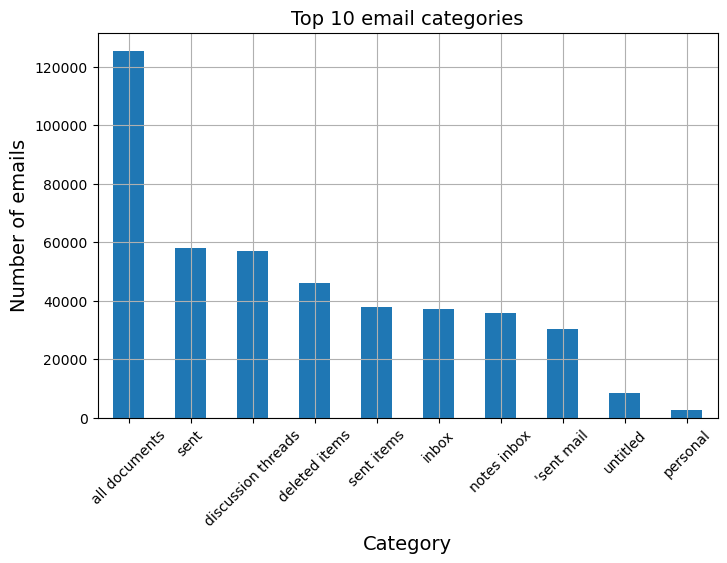

In [78]:
plt.figure(figsize=(15, 7))
top_10_categories.plot(x='category', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Top 10 email categories", fontsize=14)
plt.ylabel('Number of emails', fontsize=14)
plt.xlabel('Category', fontsize=14)

In [79]:
df

,message_id,date,from,to,subject,x-from,x-folder,x-to,content,year,month,day,n_words,category
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast,2001,5,14,4,'sent mail
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,2001,5,4,139,'sent mail
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,test successful. way to go!!!,2000,10,18,5,'sent mail
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",2000,10,23,34,'sent mail
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,Let's shoot for Tuesday at 11:45.,2000,8,31,6,'sent mail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001,11,28,48,sent items
517397,<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...,2001,11,28,23,sent items
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...,2001,11,28,54,sent items
517399,<22052556.1075842030013.JavaMail.evans@thyme>,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Zufferli, John\Sent Items","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,2001,11,27,27,sent items


In [80]:
# Keep only relevant columns

df[['message_id', 'content', 'date', 'from', 'to', 'subject', 'x-from', 'x-to', 'n_words']]

,message_id,content,date,from,to,subject,x-from,x-to,n_words
0,<18782981.1075855378110.JavaMail.evans@thyme>,Here is our forecast,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,4
1,<15464986.1075855378456.JavaMail.evans@thyme>,Traveling to have a business meeting takes the...,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,139
2,<24216240.1075855687451.JavaMail.evans@thyme>,test successful. way to go!!!,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,Leah Van Arsdall,5
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,Randall L Gay,34
4,<30922949.1075863688243.JavaMail.evans@thyme>,Let's shoot for Tuesday at 11:45.,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,Greg Piper,6
...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",48
517397,<25835861.1075842029959.JavaMail.evans@thyme>,Some of my position is with the Alberta Term b...,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",23
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2\n\n -----Original Message-----\nFrom: \tDouc...,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",54
517399,<22052556.1075842030013.JavaMail.evans@thyme>,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",27


In [81]:
df = df[['message_id', 'content', 'date', 'from', 'to', 'subject', 'x-from', 'x-to', 'n_words']]
df

,message_id,content,date,from,to,subject,x-from,x-to,n_words
0,<18782981.1075855378110.JavaMail.evans@thyme>,Here is our forecast,2001-05-14 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,4
1,<15464986.1075855378456.JavaMail.evans@thyme>,Traveling to have a business meeting takes the...,2001-05-04 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,139
2,<24216240.1075855687451.JavaMail.evans@thyme>,test successful. way to go!!!,2000-10-18 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,Leah Van Arsdall,5
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,Phillip K Allen,Randall L Gay,34
4,<30922949.1075863688243.JavaMail.evans@thyme>,Let's shoot for Tuesday at 11:45.,2000-08-31 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,Greg Piper,6
...,...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,This is a trade with OIL-SPEC-HEDGE-NG (John L...,2001-11-28 13:30:11,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",48
517397,<25835861.1075842029959.JavaMail.evans@thyme>,Some of my position is with the Alberta Term b...,2001-11-28 12:47:48,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",23
517398,<28979867.1075842029988.JavaMail.evans@thyme>,2\n\n -----Original Message-----\nFrom: \tDouc...,2001-11-28 07:20:00,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",54
517399,<22052556.1075842030013.JavaMail.evans@thyme>,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,2001-11-27 11:52:45,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",27


In [82]:
df.to_csv('data/metadata.csv', index=False)